# Analysis of Emission Spectra Data

We've just been handed raw data for an experiment attempting to resolve the ratio of secondary to backscattered electrons. The experiment relies on a fixed-energy beam of electrons bombarding a sample and essentially counting how many electrons come back. Since not all the electrons come back at the same energy, we apply a incrementing bias to discern electron energies. Electrons that are considered backscattered, at least in the scope of this experiment, are ones that undergo close to elastic collisions. We would expect that all the backscattered electrons would have an energy very close to the beam energy. In the case of this experiment the beam energy was fixed at 50 eV.

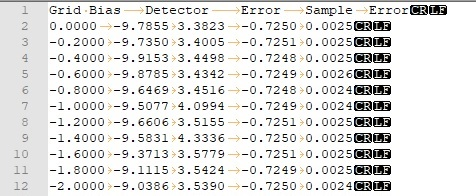

The file we're grabbing data from is a simple text file, but it is delimited with tabs. The image is of the file opened in notepad++ which allows us to see special characters. The right pointing arrows are tabs and CR LF help denote the end of the line. As you can see, headers appear in the first row which is helpful when importing for analysis. The raw data for the header categories are visible in columns. From the raw data you can see that as the Grid Bias increments in -0.2 (V), the Detector values (A) tend to approach zero. This makes sense since less and less electrons are able to get to the detector due to the increasing electric field produced by the Bias Grid.

## Python Analysis

The first step is to import useful libraries or external scripts that are necessary for the analysis. I've already designed two custom scripts that I will be calling: emission_import and emission_spec. I'll go into detail what these do a bit later. The two libraries I am calling are numpy and matplotlib. The former is incredibly useful for creating large arrays of data and the latter is fantastic for plotting data. The inclusion of the "as" part of the import is just to simplify the library name when calling functions from it. So instead of calling functions by typing matplotlib.pyplot ever time we need it... we simply import it as plt. Which saves a bit of time.

In [1]:
import sys
sys.path.append("C:/Users/Leonardo/Desktop/MISC/Emission Scripts")

import numpy as np
import matplotlib.pyplot as plt


We're going to save the raw data file's path and name, as a string, into the variable fname for convenience. The ' character lets python know that the value we're pushing to fname is a string. We're also going to push this string to a useful function within numpy known as loadtxt(). What we are expecting is 5 arrays to be returned to us: bg, c, c_e, s, s_r. As you can see from the raw data file picture above, these are simplified names of the header values... i.e. bg = Grid Bias, c = Detector.


In [2]:
fname = 'C:/Users/Leonardo/Desktop/MISC/Emission Scripts/EmissionSpectra/CNTSForest127_50eV_10_9_2018.txt'

raw = np.loadtxt(fname, skiprows=1)
bg, c, c_e, s, s_r = raw[:,0], raw[:,1], raw[:,2], raw[:,3], raw[:,4]

print('Bias Grid Array:', '\n', bg, '\n')
print('\n', 'Collector Signal Array:', '\n', c)

Bias Grid Array: 
 [  0.   -0.5  -1.   -1.5  -2.   -2.5  -3.   -3.5  -4.   -4.5  -5.   -5.5
  -6.   -6.5  -7.   -7.5  -8.   -8.5  -9.   -9.5 -10.  -10.5 -11.  -11.5
 -12.  -12.5 -13.  -13.5 -14.  -14.5 -15.  -15.5 -16.  -16.5 -17.  -17.5
 -18.  -18.5 -19.  -19.5 -20.  -20.5 -21.  -21.5 -22.  -22.5 -23.  -23.5
 -24.  -24.5 -25.  -25.5 -26.  -26.5 -27.  -27.5 -28.  -28.5 -29.  -29.5
 -30.  -30.5 -31.  -31.5 -32.  -32.5 -33.  -33.5 -34.  -34.5 -35.  -35.5
 -36.  -36.5 -37.  -37.5 -38.  -38.5 -39.  -39.5 -40.  -40.5 -41.  -41.5
 -42.  -42.5 -43.  -43.5 -44.  -44.5 -45.  -45.5 -46.  -46.5 -47.  -47.5
 -48.  -48.5 -49.  -49.5 -50.  -50.5 -51.  -51.5 -52.  -52.5 -53.  -53.5
 -54.  -54.5 -55.  -55.5 -56.  -56.5 -57.  -57.5 -58.  -58.5 -59.  -59.5
 -60. ] 


 Collector Signal Array: 
 [-21.261  -21.0342 -20.783  -20.3979 -19.4348 -17.9877 -16.64   -15.382
 -14.1743 -13.1471 -12.2194 -11.4226 -10.6514  -9.987   -9.3729  -8.8232
  -8.3161  -7.8813  -7.4115  -7.0719  -6.7326  -6.4423  -6.0946  -5.


The last portion of the code was to print all the values in the array bg and the array c. As you can see the Bias Grid started at 0 V, incremented at -0.5 V up to -60 V. We wouldn't expect any electrons to get to the collector once the Bias Grid got to the beam energy of 50 eV. What we have done is essentially separated the columns into five different arrays. This allows us to easily run specific data points through necessary functions and allows ease of plotting.



When using arrays it's important to understand that the first column or first row is the 0th, instead of the 1st. So when it says raw[:,0] what it actually says is that it wants all ROWS from the 0th column (the first column in the array). It then assigns that 1-D array to the variable bias_grid and continues on with collector, c_err, so on.



The graph below shows the current passing through the collector as the bias approaches its maximum. The collector is capturing all the electrons in order to get an idea of how many are being "emitted" from the sample. Since the values of bg and c are negative, a simple tweak is performed to make them positive: plt.plot(-bg, -c, 'b').


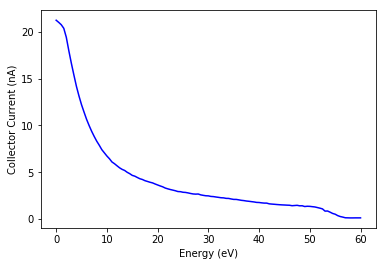

In [3]:
plt.figure(1)
plt.plot(-bg, -c, 'b')
plt.xlabel('Energy (eV)')
plt.ylabel('Collector Current (nA)')
#plt.fill_betweenx(spect, energy, where = energy <= 45, facecolor='blue')
#plt.fill_between(energy, spect, facecolor='blue')
#plt.fill_betweenx(spect, 50, energy_upper, where = energy_upper <= 60, facecolor='red')
plt.rcParams["figure.figsize"] = (12,5)
plt.axis()
plt.show()


Since all the values in bg are negative (-V), we're going to multiply them all by -1 to show how easy it is to multiply all values of an array by a scalar. This is done below by assigning this new positive array as energy, energy = -1 x bg. To the proportional data we'll scale all the collector data points. We do this by dividing every point by the maximum collector signal value, at which the Bias Grid = 0. After the collector data has been scaled, we differentiate the collector data with respect to the bias grid values. This scaled and differentiated collector array is assigned to the spect array for graphing later.



The latter part of this code block is used to help discern secondary and backscattered regions from each other later in this notebook. Numpy allows the possibility of masking data points. This is helpful when you want to graph only a portion of one array without losing the placement of its elements or the size of the array itself. The final command is to print the masked array to show what the array looks like when some of its values have been masked.


In [4]:
energy = -1*bg
c_norm = c / np.abs(c[0])

spect = np.gradient(c_norm, energy)

energy_upper = np.ma.masked_less(energy, 50)
print(energy_upper)

[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- 50.0 50.5 51.0 51.5 52.0 52.5 53.0 53.5 54.0 54.5 55.0 55.5
 56.0 56.5 57.0 57.5 58.0 58.5 59.0 59.5 60.0]


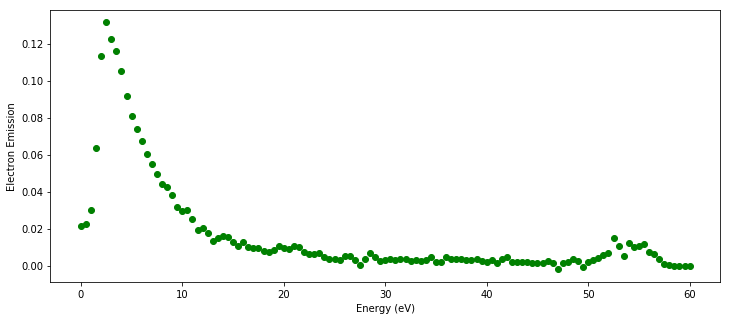

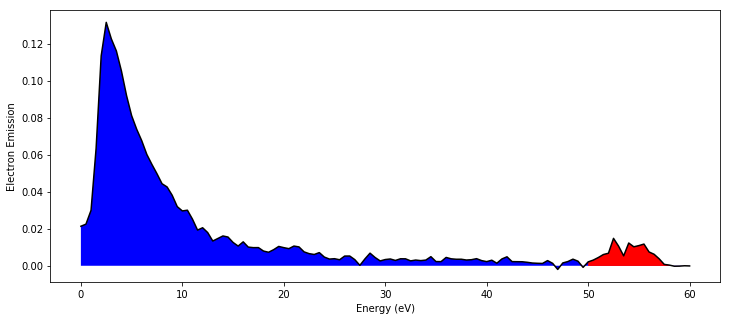

In [6]:
plt.figure(2)
plt.plot(energy, spect, 'go')
plt.xlabel('Energy (eV)')
plt.ylabel('Electron Emission')
#plt.fill_betweenx(spect, energy, where = energy <= 45, facecolor='blue')
#plt.fill_between(energy, spect, facecolor='blue')
#plt.fill_betweenx(spect, 50, energy_upper, where = energy_upper <= 60, facecolor='red')
plt.rcParams["figure.figsize"] = (12,5)
plt.axis()
plt.show()

plt.figure(3)
plt.plot(energy, spect, 'black')
plt.xlabel('Energy (eV)')
plt.ylabel('Electron Emission')
#plt.fill_betweenx(spect, energy, where = energy <= 45, facecolor='blue')
plt.fill_between(energy, spect, facecolor='blue')
plt.fill_betweenx(spect, 50, energy_upper, where = energy_upper <= 60, facecolor='red')
plt.rcParams["figure.figsize"] = (12,5)
plt.axis()
plt.show()


The first graph shows the data points and then curve they create. Differentiating between backscatter and secondary electrons in integral to spacecraft charging research. As electrons penetrate in the material, their interactions produce varying effects. If the incoming electrons happen to interact with the material in a elastic way, they keep a good portion of their energy and reflect right back out. However, if the incoming electrons start to inelastically interact with the material, that energy is able to be dispersed and provide many other electrons in the material to be released. In such a situation you could have one higher energy electron producing many lower energy electrons that are emitted from the material. Depending on this ratio, charging of the material can occur.



The second graph provides a view of what portion of these electrons could be considered secondary. All the blue shaded region is the proportion of electrons "emitted" from the sample considered secondary electrons. Electrons that are released from the material itself. The red shaded region shows the proportion of backscattered electrons, which usually hold the same energy as the incident beam. However, the beam was full of electrons at 50 eV... the reason why we see a broad area of backscatter electrons is due to the variance in energies within the beam and also whether the gun itself has an offset from the digital readout.



...and with that, we've been able to consolidate and prepare a dataset for analysis with about 6 lines of python code.
